 ## Análisis exploratorio de datos

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats


In [24]:
df1 = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/moved_project_sql_result_04.csv')

In [25]:
print(df1.head(10))

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [26]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [27]:
print(df1.duplicated().count())

64


In [28]:
df1.drop_duplicates()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [29]:
print(df2.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [30]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [31]:
print(df2.duplicated().count())

94


In [32]:
df2.drop_duplicates()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [33]:
df2['average_trips'] = df2['average_trips'].round()

In [34]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.0
1,River North,9524.0
2,Streeterville,6665.0
3,West Loop,5164.0
4,O'Hare,2547.0


In [35]:
df2['average_trips'] = df2['average_trips'].astype(int)

In [36]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


### Identificar los 10 principales barrios en términos de finalización del recorrido

In [37]:
top_10 = df2.sort_values(by='average_trips', ascending=False).head(10)
print(top_10)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9524
2         Streeterville           6665
3             West Loop           5164
4                O'Hare           2547
5             Lake View           2421
6            Grant Park           2069
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1260


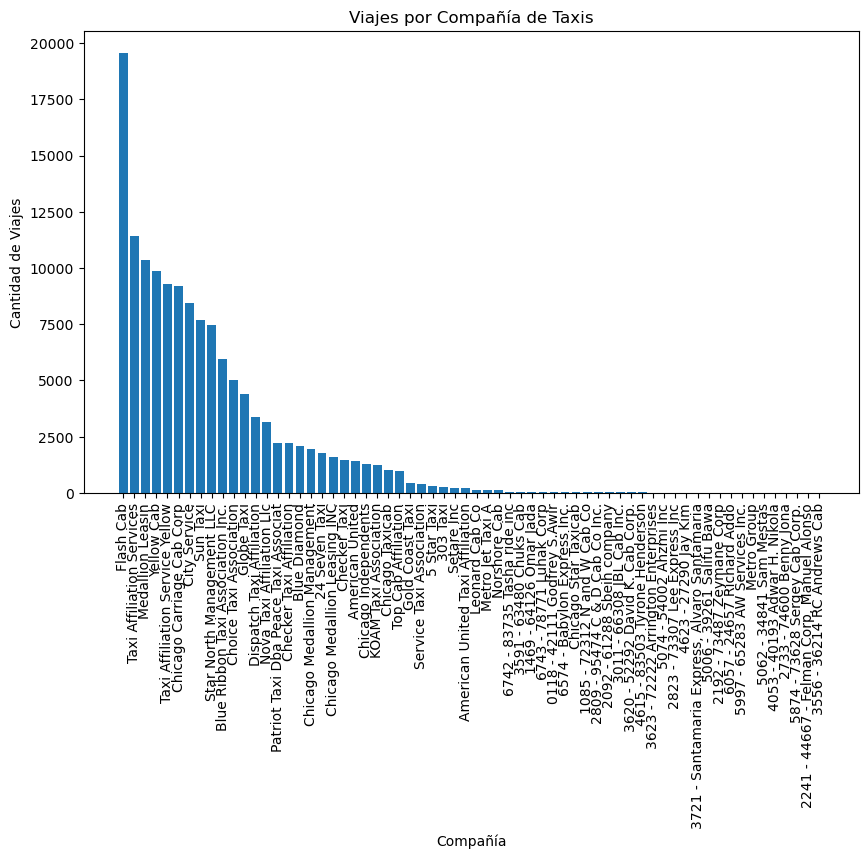

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(df1['company_name'], df1['trips_amount'])
plt.xlabel('Compañía')
plt.ylabel('Cantidad de Viajes')
plt.title('Viajes por Compañía de Taxis')
plt.xticks(rotation=90)
plt.show()

In [46]:
top_10_companies = df1.sort_values(by='trips_amount', ascending=False).head(10)

print(top_10_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


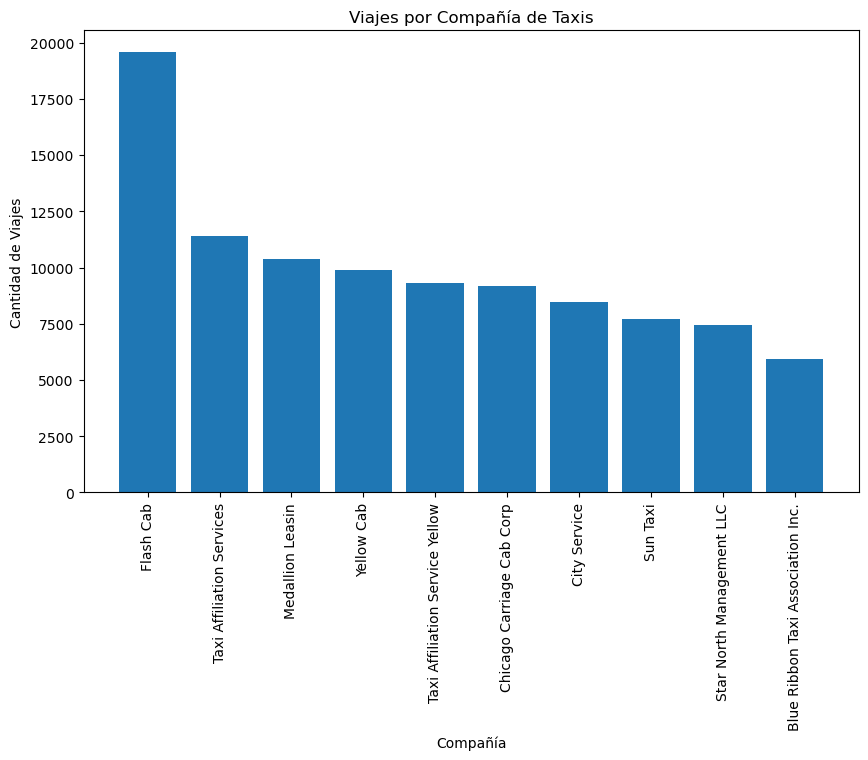

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.xlabel('Compañía')
plt.ylabel('Cantidad de Viajes')
plt.title('Viajes por Compañía de Taxis')
plt.xticks(rotation=90)
plt.show()

El gráfico muestra que la empresa 'Flash Cab' lideró el mercado ese día con una diferencia de 10 veces la cantidad de viajes del décimo puesto en el ranking. Se puede decir que fue la compañía favorita del público.
Más hacen falta datos para determinarlo de manera indiscutible y precisa, como la cantidad de taxis que tienen en circulación, los costos y las zonas en las que se concentran. 

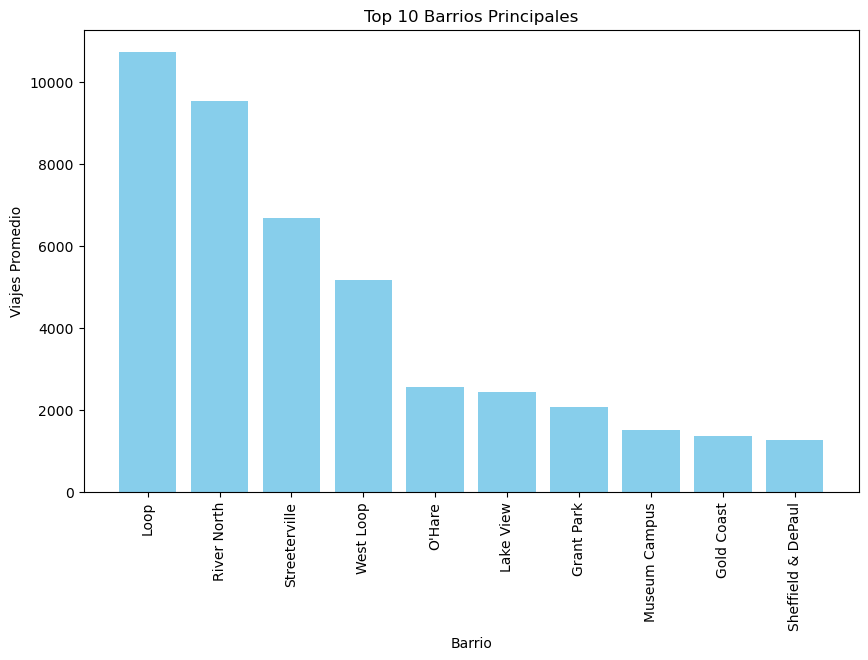

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(top_10['dropoff_location_name'], top_10['average_trips'], color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Viajes Promedio')
plt.title('Top 10 Barrios Principales')
plt.xticks(rotation=90)
plt.show()

El gráfico indica que los barrios con el mayor número de viajes finalizados son los más concurridos en términos de tráfico de taxis, lo que podría reflejar áreas con alta demanda de taxis.

## Prueba de hipótesis

In [40]:
df3 = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

In [41]:
print(df3.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


### Prueba de hipótesis

- Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

- Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Recordemos que la hipótesis nula siempre es la igualdad.

### Criterio para probar las hipótesis:
Utilizaremos una prueba t para muestras independientes, comparando la duración promedio de los viajes en condiciones meteorológicas "Good" y "Bad".

In [42]:
good_weather = df3[df3['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df3[df3['weather_conditions'] == 'Bad']['duration_seconds']

t_stat, p_value = stats.ttest_ind(good_weather, bad_weather, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

Rechazamos la hipótesis nula.


### La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.